In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

from scipy import linalg
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


## Question 1A: Kalman Filters in Time Series Analysis

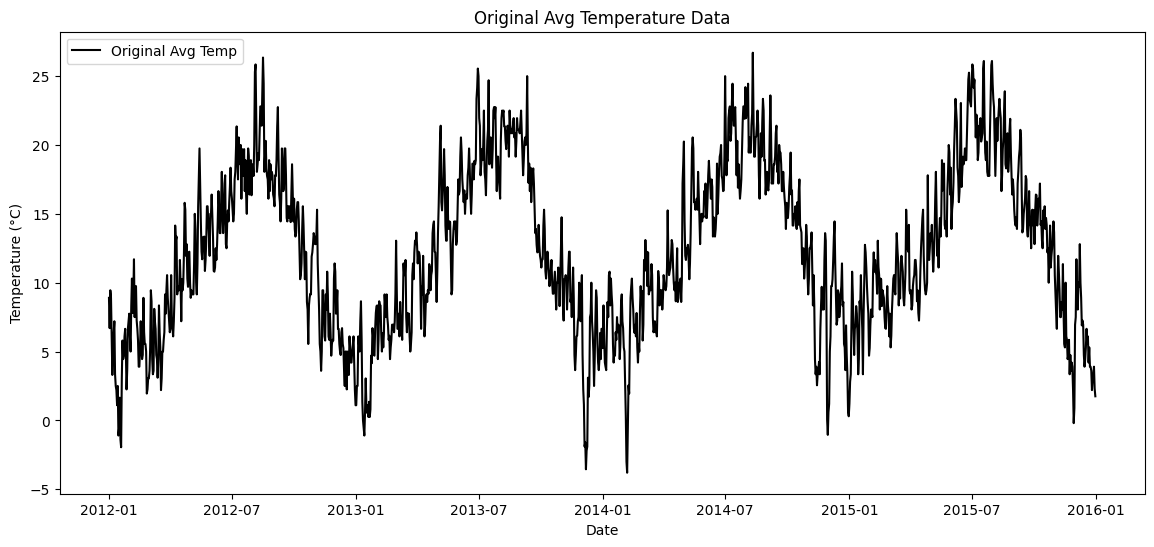

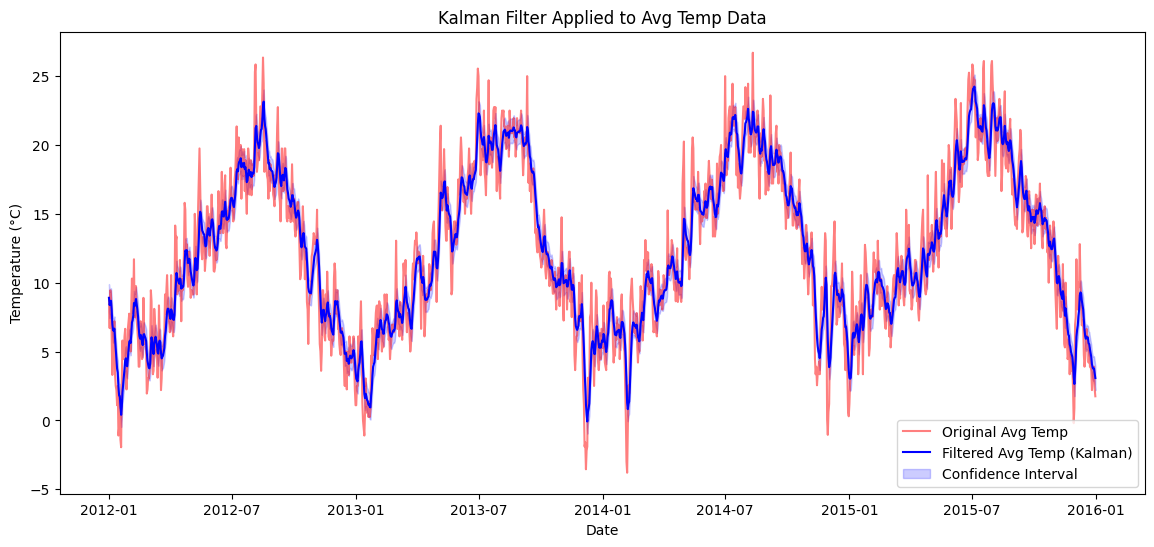

In [8]:
class KalmanFilter:
    def __init__(self, alpha, q, r, initial_state, initial_variance):
        """
        Initializes the Kalman filter with parameters.
        
        Args:
            alpha (float): State transition coefficient.
            q (float): Process noise standard deviation.
            r (float): Measurement noise standard deviation.
            initial_state (float): Initial state estimate.
            initial_variance (float): Initial error covariance.
        """
        self.alpha = alpha
        self.q = q
        self.r = r
        self.mu = initial_state
        self.sigma = initial_variance

    def filter(self, data):
        """
        Applies the Kalman filter to the input data.
        
        Args:
            data (np.array): The data array to filter.
        
        Returns:
            mu_filtered (np.array): Array of filtered state estimates.
            sigma_filtered (np.array): Array of filtered variances.
        
        TODO:
        - Implement the prediction and update steps of the Kalman filter.
        """
        T = len(data)
        mu_filtered = np.zeros(T)
        sigma_filtered = np.zeros(T)
        mu_filtered[0] = self.mu
        sigma_filtered[0] = self.sigma

        for t in range(1, T):
            # TODO: Implement prediction step
           # mu_prior = NotImplemented  # Replace with: μ_prior_t = α * μ_t-1
            mu_prior = self.alpha * mu_filtered[t-1]
            #sigma_prior = NotImplemented  # Replace with: σ_prior_t = q^2 + (α^2) * σ_t-1
            sigma_prior = self.q**2 + (self.alpha**2 * sigma_filtered[t-1])

            # TODO: Implement update step
            #K = NotImplemented  # Replace with: σ_prior_t / (σ_prior_t + r^2)
            k = sigma_prior / (sigma_prior + self.r**2)
            #mu_filtered[t] = NotImplemented  # Replace with: μ_t = μ_prior_t + K_t * (data_t - μ_prior_t)
            mu_filtered[t] = mu_prior + k * (data[t] - mu_prior)
            #sigma_filtered[t] = NotImplemented  # Replace with: σ_t = (1 - K_t) * σ_prior_t
            sigma_filtered[t] = (1-k) * sigma_prior

        return mu_filtered, sigma_filtered

    def plot_results(self, dates, data, mu_filtered, sigma_filtered):
        """
        Plots the original and filtered data along with the confidence interval.
        
        Args:
            dates (pd.Index): Date index for the data.
            data (np.array): Original data.
            mu_filtered (np.array): Filtered state estimates.
            sigma_filtered (np.array): Filtered variances.
        """
        plt.figure(figsize=(14, 6))
        plt.plot(dates, data, label='Original Avg Temp', color='red', alpha=0.5)
        plt.plot(dates, mu_filtered, label='Filtered Avg Temp (Kalman)', color='blue')
        plt.fill_between(dates, mu_filtered + sigma_filtered, mu_filtered - sigma_filtered, color='blue', alpha=0.2, label='Confidence Interval')
        plt.title('Kalman Filter Applied to Avg Temp Data')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.show()

# Main function with TODOs for students to complete
if __name__ == "__main__":
    # TODO: Load the dataset and preprocess it
    #weather_df = NotImplemented # TODO Load the data using the 'parse_dates' and 'index_col' arguments
    weather_df = pd.read_csv('seattle-weather.csv', parse_dates=True, index_col='date')
    #weather_df = NotImplemented  # TODO: Select 'temp_max', 'temp_min', and 'weather' columns and drop NaN values
    weather_df = weather_df[['temp_max', 'temp_min', 'weather']].dropna()
    
    # Calculate the average temperature
    #weather_df['temp_avg'] = NotImplemented  # TODO: Calculate the average temperature 
    weather_df['temp_avg'] = (weather_df['temp_max'] + weather_df['temp_min']) / 2
    
    # Plot the original average temperature data
    plt.figure(figsize=(14, 6))
    plt.plot(weather_df.index, weather_df['temp_avg'], label='Original Avg Temp', color='black')
    plt.title('Original Avg Temperature Data')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

    # TODO: Set Kalman filter parameters
    #alpha = NotImplemented  # Replace with appropriate value
    alpha = 1.0
    #q = NotImplemented  # Replace with appropriate value
    q = 0.5
    #r = NotImplemented  # Replace with appropriate value
    r = 2.0
    initial_state = weather_df['temp_avg'].values[0]  # Initial state estimate
    initial_variance = 1  # Initial error covariance

    # Initialize the Kalman filter
    kf = KalmanFilter(alpha, q, r, initial_state, initial_variance)

    # Run the Kalman filter on the temperature data
    temp_avg_data = weather_df['temp_avg'].values
    mu_filtered, sigma_filtered = kf.filter(temp_avg_data)

    # Plot results
    kf.plot_results(weather_df.index, temp_avg_data, mu_filtered, sigma_filtered)


## Question 1B: Hidden Markov Models (HMMs) in Time Series Analysis

In [ ]:
class HiddenMarkovModel:
    def __init__(self, num_states, num_observations):
        """
        Initializes the HMM with random transition, emission, and initial state probabilities.
        
        Args:
            num_states (int): Number of hidden states.
            num_observations (int): Number of unique observations.
        """
        self.num_states = num_states
        self.num_observations = num_observations
        self.A = np.random.dirichlet(np.ones(num_states), num_states)  # Transition matrix
        self.B = np.random.dirichlet(np.ones(num_observations), num_states)  # Emission matrix
        self.pi = np.random.dirichlet(np.ones(num_states))  # Initial state distribution
        
        # Log-space versions to avoid underflow
        self.A_log = np.log(self.A + 1e-10)
        self.B_log = np.log(self.B + 1e-10)
        self.pi_log = np.log(self.pi + 1e-10)

    def forward_algorithm_log(self, O):
        """
        Forward algorithm in log-space.
        
        Args:
            O (np.array): Observation sequence (integers).
        
        Returns:
            alpha_log (np.array): Log-probability matrix of forward probabilities.
        
        TODO:
        - Implement the forward algorithm initialization and recursion in log-space.
        """
        T = len(O)
        N = self.num_states
        alpha_log = np.zeros((T, N))

        # TODO: Initialization step
        #alpha_log[0] = NotImplemented  # Replace with initialization logic: log(α_0) = log(π) + log(B[:, O_0])
        '''
        product of the initial state probability and the emission probability for the first observation
        '''
        alpha_log[0] = self.pi_log + self.B_log[:, O[0]]


        # TODO: Recursion step
        '''
        for subsequent time steps, the forward probability at time t for state j, is computed by summing over all possible previous states i with the transition and emission probabilities
        '''
        for t in range(1, T):
            for j in range(N):
                #alpha_log[t, j] = NotImplemented  # Replace with recursion logic
                alpha_log[t, j] = np.logaddexp.reduce(alpha_log[t-1] + self.A_log[:, j]) + self.B_log[j, O[t]]

        return alpha_log

    def backward_algorithm_log(self, O):
        """
        Backward algorithm in log-space.
        
        Args:
            O (np.array): Observation sequence (integers).
        
        Returns:
            beta_log (np.array): Log-probability matrix of backward probabilities.
        
        TODO:
        - Implement the backward algorithm initialization and recursion in log-space. 
        """
        T = len(O)
        N = self.num_states
        beta_log = np.zeros((T, N))

        '''
        we compute the probability of observing the remaining sequence given a particular state at each time step 
        '''
        # TODO: Initialization step
        '''
        at the last time step, the probability is zero, because they are no observations left to process 
        '''
        beta_log[-1] = 0  # log(1) = 0
        

        # TODO: Recursion step
        '''
        for each preceding time step, the backward prob for state i is computed by summing over all possible next states j and the transition and emission probs
        '''
        for t in range(T - 2, -1, -1):
            for i in range(N):
                #beta_log[t, i] = NotImplemented  # Replace with recursion logic
                beta_log[t, i] = np.logaddexp.reduce(self.A_log[i, :] + self.B_log[:, O[t+1]] + beta_log[t+1, :])

        return beta_log

    def baum_welch_log(self, O, max_iter=100, epsilon=1e-6):
        """
        Baum-Welch algorithm for training HMM in log-space.
        
        Args:
            O (np.array): Observation sequence (integers).
            max_iter (int): Maximum number of iterations.
            epsilon (float): Small value to prevent division by zero.
        
        Returns:
            Trained transition, emission, and initial state distributions.
        
        TODO:
        - Implement the update steps for transition and emission probabilities.
        """
        T = len(O)
        
        ''' 
        This is an EM (Expectation Maximazation) algorithm used to train HMMs. We use this to update the transitions and emission matrices by computing the expected state transitions (xi_log) and expected state occupancy - (gamma_log)
        
        gamma_log = probability of being in state i at time t, given  the full observation sequence
        
        xi_log = represents the probability of being state i at time t and state j at time t+1
        '''
        
        for iteration in range(max_iter):
            # TODO: Call forward_algorithm_log and backward_algorithm_log
            #alpha_log = NotImplemented  # Call forward algorithm
            alpha_log = self.forward_algorithm_log(O)
            #beta_log = NotImplemented  # Call backward algorithm
            beta_log = self.backward_algorithm_log(O)

            # Compute gamma and xi in log-space
            gamma_log = alpha_log + beta_log - np.logaddexp.reduce(alpha_log[-1])
            xi_log = np.zeros((T - 1, self.num_states, self.num_states))

            for t in range(T - 1):
                #denom_log = NotImplemented  # Replace with logic for computing the denominator
                denom_log = np.logaddexp.reduce(alpha_log[t] + beta_log[t])
                for i in range(self.num_states):
                    for j in range(self.num_states):
                        xi_log[t, i, j] = alpha_log[t, i] + self.A_log[i, j] + self.B_log[j, O[t + 1]] + beta_log[t + 1, j] - denom_log

                        

            # TODO: Update A_log, B_log, and pi_log
            #self.A_log = NotImplemented  # Replace with logic for updating A_log
            self.A_log = np.logaddexp.reduce(xi_log, axis=0) - np.logaddexp.reduce(gamma_log[:-1], axis=0)[:, None]
            #self.B_log = NotImplemented  # Replace with logic for updating B_log
            self.B_log = np.logaddexp.reduce(gamma_log, axis=0) - np.logaddexp.reduce(gamma_log, axis=0)[:, None]
            #self.pi_log = NotImplemented  # Replace with logic for updating pi_log
            self.pi_log = gamma_log[0]


        return np.exp(self.A_log), np.exp(self.B_log), np.exp(self.pi_log)

    def viterbi_algorithm_log(self, O):
        """
        Viterbi algorithm for finding the most likely state sequence in log-space.
        
        Args:
            O (np.array): Observation sequence (integers).
        
        Returns:
            states (np.array): Most likely state sequence.
        
        TODO:
        - Implement the Viterbi algorithm's initialization and recursion steps.
        """
        T = len(O)
        N = self.num_states
        delta_log = np.zeros((T, N))
        psi = np.zeros((T, N), dtype=int)

        # TODO: Initialization step
        ''' 
        it is the product of the initial state probability and the emission probability for the first observation
        '''
        # delta_log[0] = NotImplemented  # Replace with initialization logic
        delta_log[0] = self.pi_log + self.B_log[:, O[0]]


        # TODO: Recursion step
        '''
        For subsequent time steps, the Viterbi probability at time t for state j is computed by finding the maximum probability of being in each possible state at time t-1 and transitioning to state j
        '''
        for t in range(1, T):
            for j in range(N):
                #delta_log[t, j] = NotImplemented  # Replace with recursion logic
                delta_log[t, j] = np.max(delta_log[t-1] + self.A_log[:, j]) + self.B_log[j, O[t]]
                #psi[t, j] = NotImplemented  # Replace with logic for tracking the path
                psi[t, j] = np.argmax(delta_log[t-1] + self.A_log[:, j])

        # TODO: Path backtracking
        ''' 
        Once we have the Viterbi probabilities, we can backtrack to find the most likely sequence of states.
        '''
        states = np.zeros(T, dtype=int)
        states[-1] = NotImplemented  # Replace with logic for the final state
        for t in range(T - 2, -1, -1):
            # states[t] = NotImplemented  # Replace with path backtracking logic
            states[t] = psi[t + 1, states[t + 1]]

        return states

# Main function with TODOs for students to complete
if __name__ == "__main__":
    # Load and preprocess the weather dataset
    #weather_df = NotImplemented # TODO Load the data using the 'parse_dates' and 'index_col' arguments
    weather_df = pd.read_csv('seattle-weather.csv', parse_dates=True, index_col='date')
    #weather_df = NotImplemented  # TODO: Select 'temp_max', 'temp_min', and 'weather' columns and drop NaN values
    weather_df = weather_df[['temp_max', 'temp_min', 'weather']].dropna()
    
    
  

    # Calculate the average temperature and encode the 'weather' column
    #weather_df['temp_avg'] = NotImplemented #TODO Calculate the average temperature
    weather_df['temp_avg'] = (weather_df['temp_max'] + weather_df['temp_min']) / 2

    weather_mapping = {label: idx for idx, label in enumerate(weather_df['weather'].unique())}
    reverse_weather_mapping = {v: k for k, v in weather_mapping.items()}
    weather_df['weather_encoded'] = weather_df['weather'].map(weather_mapping)

    # Convert average temperature to integer values for the observation sequence
    temp_min = weather_df['temp_avg'].min()
    O = (weather_df['temp_avg'] - temp_min).astype(int).values  # Observation sequence

    # Split data into training and testing sets
    train_size = int(0.8 * len(O))
    O_train = O[:train_size]
    O_test = O[train_size:]
    actual_train = weather_df['weather_encoded'].values[:train_size]
    actual_test = weather_df['weather_encoded'].values[train_size:]

    # Initialize and train the HMM
    num_states = len(weather_mapping)
    num_observations = O.max() + 1
    hmm = HiddenMarkovModel(num_states, num_observations)

    # TODO: Train the HMM using Baum-Welch on training data
    #A_trained, B_trained, pi_trained = NotImplemented  
    A_trained, B_trained, pi_trained = hmm.baum_welch_log(O_train)
    

    # TODO: Use the Viterbi algorithm for decoding the most likely state sequence
   # train_predicted_states = NotImplemented  
    train_predicted_states = hmm.viterbi_algorithm_log(O_train)
    # test_predicted_states = NotImplemented  
    test_predicted_states = hmm.viterbi_algorithm_log(O_test)

    # Decode predicted states
    # train_decoded_states = NotImplemented  
    train_decoded_states = [reverse_weather_mapping[state] for state in train_predicted_states]
    # test_decoded_states = NotImplemented  
    test_decoded_states = [reverse_weather_mapping[state] for state in test_predicted_states]


    # TODO: Create and display comparison DataFrames for train and test sets
    train_comparison = pd.DataFrame({
        'Actual': [reverse_weather_mapping[state] for state in actual_train],
        'Predicted': train_decoded_states
    })
    test_comparison = pd.DataFrame({
        'Actual': [reverse_weather_mapping[state] for state in actual_test],
        'Predicted': test_decoded_states
    })

    # TODO: Evaluate accuracy for training and testing sets
    #train_accuracy = NotImplemented  
    train_accuracy = accuracy_score(actual_train, train_predicted_states)
    # test_accuracy = NotImplemented  
    test_accuracy = accuracy_score(actual_test, test_predicted_states)
    

    print("\nHMM Performance:")
    print(f"Training Set Accuracy: {train_accuracy:.2%}")
    print(f"Testing Set Accuracy: {test_accuracy:.2%}")


In [13]:
import numpy as np
import pandas as pd

class HiddenMarkovModel:
    def __init__(self, num_states, num_observations):
        """
        Initializes the HMM with random transition, emission, and initial state probabilities.
        
        Args:
            num_states (int): Number of hidden states.
            num_observations (int): Number of unique observations.
        """
        self.num_states = num_states
        self.num_observations = num_observations
        self.A = np.random.dirichlet(np.ones(num_states), num_states)  # Transition matrix
        self.B = np.random.dirichlet(np.ones(num_observations), num_states)  # Emission matrix
        self.pi = np.random.dirichlet(np.ones(num_states))  # Initial state distribution
        
        # Log-space versions to avoid underflow
        self.A_log = np.log(self.A + 1e-10)
        self.B_log = np.log(self.B + 1e-10)
        self.pi_log = np.log(self.pi + 1e-10)

    def forward_algorithm_log(self, O):
        T = len(O)
        N = self.num_states
        alpha_log = np.zeros((T, N))

        # Initialization
        alpha_log[0] = self.pi_log + self.B_log[:, O[0]]

        # Recursion
        for t in range(1, T):
            for j in range(N):
                alpha_log[t, j] = np.logaddexp.reduce(alpha_log[t - 1] + self.A_log[:, j]) + self.B_log[j, O[t]]

        return alpha_log

    def backward_algorithm_log(self, O):
        T = len(O)
        N = self.num_states
        beta_log = np.zeros((T, N))

        # Initialization
        beta_log[-1] = 0  # log(1) = 0

        # Recursion
        for t in range(T - 2, -1, -1):
            for i in range(N):
                beta_log[t, i] = np.logaddexp.reduce(
                    self.A_log[i] + self.B_log[:, O[t + 1]] + beta_log[t + 1]
                )

        return beta_log

    def baum_welch_log(self, O, max_iter=100, epsilon=1e-6):
        T = len(O)
        for iteration in range(max_iter):
            alpha_log = self.forward_algorithm_log(O)
            beta_log = self.backward_algorithm_log(O)

            # Compute gamma and xi in log-space
            gamma_log = alpha_log + beta_log - np.logaddexp.reduce(alpha_log[-1])
            xi_log = np.zeros((T - 1, self.num_states, self.num_states))

            for t in range(T - 1):
                xi_log[t] = self.A_log + self.B_log[:, O[t + 1]] + beta_log[t + 1] + alpha_log[t].reshape(-1, 1)
                xi_log[t] -= np.logaddexp.reduce(xi_log[t].flatten())

            # Update transition, emission, and initial probabilities
            self.A_log = np.logaddexp.reduce(xi_log, axis=0) - np.logaddexp.reduce(gamma_log[:-1], axis=0).reshape(-1, 1)
            self.B_log = np.zeros_like(self.B_log)
            for k in range(self.num_observations):
                mask = (O == k)
                self.B_log[:, k] = np.logaddexp.reduce(gamma_log[mask], axis=0) - np.logaddexp.reduce(gamma_log, axis=0)
            self.pi_log = gamma_log[0]

        return np.exp(self.A_log), np.exp(self.B_log), np.exp(self.pi_log)

    def viterbi_algorithm_log(self, O):
        T = len(O)
        N = self.num_states
        delta_log = np.zeros((T, N))
        psi = np.zeros((T, N), dtype=int)

        # Initialization
        delta_log[0] = self.pi_log + self.B_log[:, O[0]]

        # Recursion
        for t in range(1, T):
            for j in range(N):
                scores = delta_log[t - 1] + self.A_log[:, j]
                delta_log[t, j] = np.max(scores) + self.B_log[j, O[t]]
                psi[t, j] = np.argmax(scores)

        # Path backtracking
        states = np.zeros(T, dtype=int)
        states[-1] = np.argmax(delta_log[-1])
        for t in range(T - 2, -1, -1):
            states[t] = psi[t + 1, states[t + 1]]

        return states


if __name__ == "__main__":
    # Load and preprocess the weather dataset
    weather_df = pd.read_csv('seattle-weather.csv', parse_dates=True, index_col='date')
    weather_df = weather_df[["temp_max", "temp_min", "weather"]].dropna()

    # Calculate the average temperature and encode the 'weather' column
    weather_df["temp_avg"] = (weather_df["temp_max"] + weather_df["temp_min"]) / 2
    weather_mapping = {label: idx for idx, label in enumerate(weather_df["weather"].unique())}
    reverse_weather_mapping = {v: k for k, v in weather_mapping.items()}
    weather_df["weather_encoded"] = weather_df["weather"].map(weather_mapping)

    # Convert average temperature to integer values for the observation sequence
    temp_min = weather_df["temp_avg"].min()
    O = (weather_df["temp_avg"] - temp_min).astype(int).values

    # Split data into training and testing sets
    train_size = int(0.8 * len(O))
    O_train, O_test = O[:train_size], O[train_size:]
    actual_train = weather_df["weather_encoded"].values[:train_size]
    actual_test = weather_df["weather_encoded"].values[train_size:]

    # Initialize and train the HMM
    num_states = len(weather_mapping)
    num_observations = O.max() + 1
    hmm = HiddenMarkovModel(num_states, num_observations)
    A_trained, B_trained, pi_trained = hmm.baum_welch_log(O_train)

    # Decode the most likely state sequence
    train_predicted_states = hmm.viterbi_algorithm_log(O_train)
    test_predicted_states = hmm.viterbi_algorithm_log(O_test)

    # Decode predicted states to weather labels
    train_decoded_states = [reverse_weather_mapping[s] for s in train_predicted_states]
    test_decoded_states = [reverse_weather_mapping[s] for s in test_predicted_states]

    # Evaluate accuracy
    train_accuracy = np.mean(train_predicted_states == actual_train)
    test_accuracy = np.mean(test_predicted_states == actual_test)

    print("\nHMM Performance:")
    print(f"Training Set Accuracy: {train_accuracy:.2%}")
    print(f"Testing Set Accuracy: {test_accuracy:.2%}")



HMM Performance:
Training Set Accuracy: 21.32%
Testing Set Accuracy: 18.43%


## Question 2: Markov Chain for Stock Price Prediction 

In [ ]:
class StockDataAnalysis:
    def __init__(self, ticker, start_date, end_date, n_states=5):
        """
        Initialize the StockDataAnalysis with stock parameters and state count.
        
        Args:
            ticker (str): Stock ticker symbol.
            start_date (datetime): Start date for data retrieval.
            end_date (datetime): End date for data retrieval.
            n_states (int): Number of quantile-based states.
        """
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.n_states = n_states
        self.df = None
        self.transition_matrix = None

    def get_stock_data(self):
        """
        Download historical stock data from Yahoo Finance and preprocess it.
        """
        stock = yf.Ticker(self.ticker)
        df = stock.history(start=self.start_date, end=self.end_date)
        df['Daily_Return'] = NotImplemented #TODO Extract the close price and calculate daily returns
        self.df = NotImplemented  #TODO Remove NaN values
        print(f"Stock data for {self.ticker} loaded successfully.")

    def assign_states(self):
        """
        Assign states based on return quantiles and add descriptive labels.
        """
        self.df['State'] = pd.qcut(self.df['Daily_Return'], q=self.n_states, labels=False)
        state_labels = NotImplemented #TODO Initialize state lables in a list in the order described in the question
        self.df['State_Description'] = pd.Categorical(
            [state_labels[int(i)] for i in self.df['State']]
        )
        print("States assigned based on quantiles.")

    def get_transition_matrix(self):
        """
        Construct the transition probability matrix from the sequence of states.
        
        Returns:
            np.array: Transition matrix (dimensions: n_states x n_states).
        
        TODO:
        - Ensure that states are properly handled as integers without NaNs.
        - Implement a loop or vectorized operation to count transitions between states.
        - Normalize the rows of the transition matrix to get probabilities.
        """
        # TODO: Extract the 'State' column from the DataFrame as a numpy array.
        states = NotImplemented # Ensure this is done without NaNs if needed.

        # Initialize a matrix to store transition counts.
        transitions = NotImplemented 

        # TODO: Iterate through the array of states and populate the transition matrix.
        # Hint: Use a loop to increment the count for transitions from states[i] to states[i + 1].
        for i in range(len(states) - 1):
            current_state = NotImplemented  # Ensure valid integer index
            next_state = NotImplemented  # Ensure valid integer index
            transitions[current_state][next_state] += 1  # Increment the count for observed transitions.

        
        epsilon = 1e-8
        row_sums = transitions.sum(axis=1) + epsilon

        # TODO: Normalize each row of the transition matrix to create probabilities.
        # Hint: Divide each element in a row by the sum of the row to ensure each row sums to 1.
        self.transition_matrix = NotImplemented

        return self.transition_matrix


    def get_stationary_distribution(self):
        """
        Calculate the stationary distribution of the Markov chain.
        
        Returns:
            np.array: Stationary distribution (dimensions: n_states).
        """
        eigenvals, eigenvects = NotImplemented # TODO Calculate the eigenvalues and eigenvectors
        stationary = eigenvects[:, np.where(np.isclose(eigenvals, 1))[0][0]].real
        stationary = NotImplemented #TODO Normalize the stationary distribution
        print("Stationary distribution calculated.")
        return stationary

    def analyze_markov_chain(self):
        """
        Analyze and visualize Markov chain properties.
        """
        stationary_dist = NotImplemented # TODO Calculate the stationary distribution
        state_labels = NotImplemented #TODO Initialize state lables in a list in the order described in the question

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        sns.heatmap(self.transition_matrix, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1,
                    xticklabels=state_labels, yticklabels=state_labels)
        ax1.set_title('Transition Probability Matrix')
        ax1.set_xlabel('Next State')
        ax1.set_ylabel('Current State')

        bars = ax2.bar(state_labels, stationary_dist)
        ax2.set_title('Stationary Distribution')
        ax2.set_xlabel('State')
        ax2.set_ylabel('Probability')
        ax2.tick_params(axis='x', rotation=45)

        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width() / 2., height,
                     f'{height * 100:.1f}%', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        print("\nMarkov Chain Analysis Complete.")
        print("\nTransition Matrix:")
        transition_df = pd.DataFrame(self.transition_matrix,
                                     columns=state_labels,
                                     index=state_labels)
        print(transition_df)

        print("\nStationary Distribution:")
        stationary_df = pd.DataFrame({
            'State': state_labels,
            'Probability': stationary_dist
        })
        print(stationary_df)

    def simulate_price_path(self, initial_price, days):
        """
        Simulate a single price path using the Markov chain model.
        
        Args:
            initial_price (float): Starting price for the simulation.
            days (int): Number of days to simulate.
        
        Returns:
            np.array: Simulated price path.
        
        TODO:
        - Implement the logic for price path simulation based on state transitions.
        """
        prices = [initial_price]
        current_state = np.random.choice(self.n_states)

        for _ in range(days):
            next_state = np.random.choice(self.n_states, p=self.transition_matrix[current_state])
            return_pct = np.random.choice(self.df[self.df['State'] == next_state]['Daily_Return'])
            next_price = prices[-1] * (1 + return_pct / 100)
            prices.append(next_price)
            current_state = next_state

        return np.array(prices)

    def perform_simulations(self, n_simulations=1000, forecast_days=100):
        """
        Perform multiple price simulations using the Markov model.
        
        TODO:
        - Store and return simulation results.
        """
        initial_price = self.df['Close'].iloc[-1] 

        simulations = np.zeros((n_simulations, forecast_days + 1))

        for i in range(n_simulations):
            simulations[i] = NotImplemented #TODO call the simulate_price_path method

        print(f"Performed {n_simulations} simulations for {forecast_days} days.")
        return simulations

    def backtest(df, transition_matrix, n_simulations=100):
        """
        Perform walk-forward backtesting using the Markov model.
        
        TODO:
        - Implement rolling window logic to create a dynamic transition matrix for each backtest step.
        - Ensure return distributions are created for each state within the rolling window.
        - Simulate next-day prices using the dynamic transition matrix and return distributions.
        """
        window_size = 252  # One trading year
        n_states = transition_matrix.shape[0]
        predictions = np.zeros((len(df), n_simulations))

        # TODO: Iterate through the dataset, starting from the end of the initial rolling window.
        for i in range(window_size, len(df)):
            # TODO: Extract a rolling window of the data to calculate the transition matrix.
            # Hint: Use `iloc` to get rows from `i - window_size` to `i`.
            window_data = NotImplemented  

            # Check if the window data has enough valid states to build a transition matrix.
            if window_data['State'].isna().any() or len(window_data['State'].unique()) < n_states:  # Replace with a condition to check for data sufficiency.
                continue

            # TODO: Create a transition matrix from the rolling window data.
            # Hint: Call a function like `get_transition_matrix` with the states in `window_data`.
            window_transitions = NotImplemented  

            # Create return distributions for each state, ensuring non-empty arrays
            returns_by_state = [
               window_data[window_data['State'] == state]['Daily_Return'].values
                for state in range(n_states)
            ]

            # TODO: Simulate next-day prices using the current price and the transition matrix.
            # Hint: Use `simulate_price_path` for the simulation.
            current_price = df['Close'].iloc[i - 1]
            for sim in range(n_simulations):
                sim_path = NotImplemented  
                predictions[i, sim] = NotImplemented  

        # TODO: Return or process the predictions as needed for analysis.
        valid_indices = np.where(predictions.sum(axis=1) != 0)[0]
        prediction_mean = np.mean(predictions[valid_indices], axis=1)
        prediction_std = NotImplemented
        lower_bound = NotImplemented
        upper_bound = NotImplemented

        return prediction_mean, lower_bound, upper_bound


    def plot_results(df, simulations, backtest_results):
        """
        Create visualization of historical prices, backtest results, and future simulations.
        """
        prediction_mean, lower_bound, upper_bound = backtest_results
        
        # Adjust the prediction arrays to match the index length
        valid_index = len(prediction_mean)
        df_index_subset = df.index[-valid_index:]  # Ensure the x-axis matches the length of the prediction arrays
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # Plot backtesting results
        ax1.plot(df_index_subset, df['Close'].iloc[-valid_index:], color='black', label='Actual Prices')
        ax1.plot(df_index_subset, prediction_mean, color='blue', linestyle='--', label='Model Prediction')
        ax1.fill_between(df_index_subset, lower_bound, upper_bound, color='blue', alpha=0.1, label='95% Confidence Interval')
        ax1.set_title('Backtesting Results')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True)

        # Plot future simulations
        future_dates = pd.date_range(
            df.index[-1], 
            periods=simulations.shape[1],
            freq='B'
        )
        
        # Plot individual simulations
        for sim in simulations[:50]:  # Plot first 50 simulations for clarity
            ax2.plot(future_dates, sim, alpha=0.1, color='gray')
        
        # Plot confidence intervals for simulations
        sim_mean = np.mean(simulations, axis=0)
        sim_std = np.std(simulations, axis=0)
        ax2.plot(future_dates, sim_mean, color='red', label='Mean Forecast')
        ax2.fill_between(
            future_dates,
            sim_mean - 1.96 * sim_std,
            sim_mean + 1.96 * sim_std,
            color='red', alpha=0.1,
            label='95% Confidence Interval'
        )
        
        # Plot historical prices for context
        ax2.plot(df.index[-30:], df['Close'][-30:], color='black', label='Historical Prices')
        
        ax2.set_title('Future Price Simulations')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Price ($)')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

    def generate_summary_stats(df, simulations, current_price):
        """
        Generate and display summary statistics for future price simulations using tabulate.
        """
        # Calculate average predicted price
        final_prices = simulations[:, -1]  # Last price from each simulation
        mean_final_price = np.mean(final_prices)
        min_final_price = np.min(final_prices)
        max_final_price = np.max(final_prices)
        
        # Calculate prediction intervals
        lower_90 = np.percentile(final_prices, 5)
        upper_90 = np.percentile(final_prices, 95)
        lower_95 = np.percentile(final_prices, 2.5)
        upper_95 = np.percentile(final_prices, 97.5)
        
        # Calculate simulated volatility
        simulated_volatility = np.std(simulations) / np.mean(simulations) * 100  # Percentage format
        
        # Historical volatility (standard deviation of daily returns)
        historical_volatility = df['Daily_Return'].std()
        
        # Create the summary statistics table
        summary_stats = [
            ['Current Price', f"${current_price:.2f}"],
            ['Predicted Price (in 100 days)', f"${mean_final_price:.2f}"],
            ['Average Predicted Price (100 days)', f"${np.mean(final_prices):.2f}"],
            ['Prediction Range', f"${min_final_price:.2f} - ${max_final_price:.2f}"],
            ['Historical Volatility (%)', f"{historical_volatility:.2f}%"],
            ['Simulated Volatility (%)', f"{simulated_volatility:.2f}%"],
            ['90% Confidence Interval (Final Price)', f"${lower_90:.2f} - ${upper_90:.2f}"],
            ['95% Confidence Interval (Final Price)', f"${lower_95:.2f} - ${upper_95:.2f}"]
        ]
        
        # Print the summary statistics using tabulate
        print("\nFuture Prediction Statistics:")
        return(tabulate(summary_stats, headers=['Metric', 'Value'], tablefmt='psql'))
     


if __name__ == "__main__":
    ticker = NotImplemented #TODO replace with Apple Inc. ticker
    end_date = datetime.now()
    start_date = end_date - timedelta(days=2 * 365)

    stock_analysis = StockDataAnalysis(ticker, start_date, end_date)

    stock_analysis.get_stock_data()
    stock_analysis.assign_states()
    stock_analysis.get_transition_matrix()
    stock_analysis.analyze_markov_chain()

    simulations = stock_analysis.perform_simulations(n_simulations=1000, forecast_days=100)
    backtest_results = stock_analysis.backtest(n_simulations=100)

    # TODO: Call plot_results and generate_summary_stats methods
    current_price = NotImplemented # Extract the current closing stock price
